In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import seaborn as sns
import pickle
sns.set_context('poster')
import glob
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, plot_roc_curve
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance
import os
import gn4pions.modules.resolution_util as ru
import gn4pions.modules.plot_util as pu
import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=True)
plt.style.use('print')
ampl.set_color_cycle('Oceanic',10)

# Clusters

### All pions

extra_line [[0, 10000.0], [1, 1]]
['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 1600x1200 with 0 Axes>

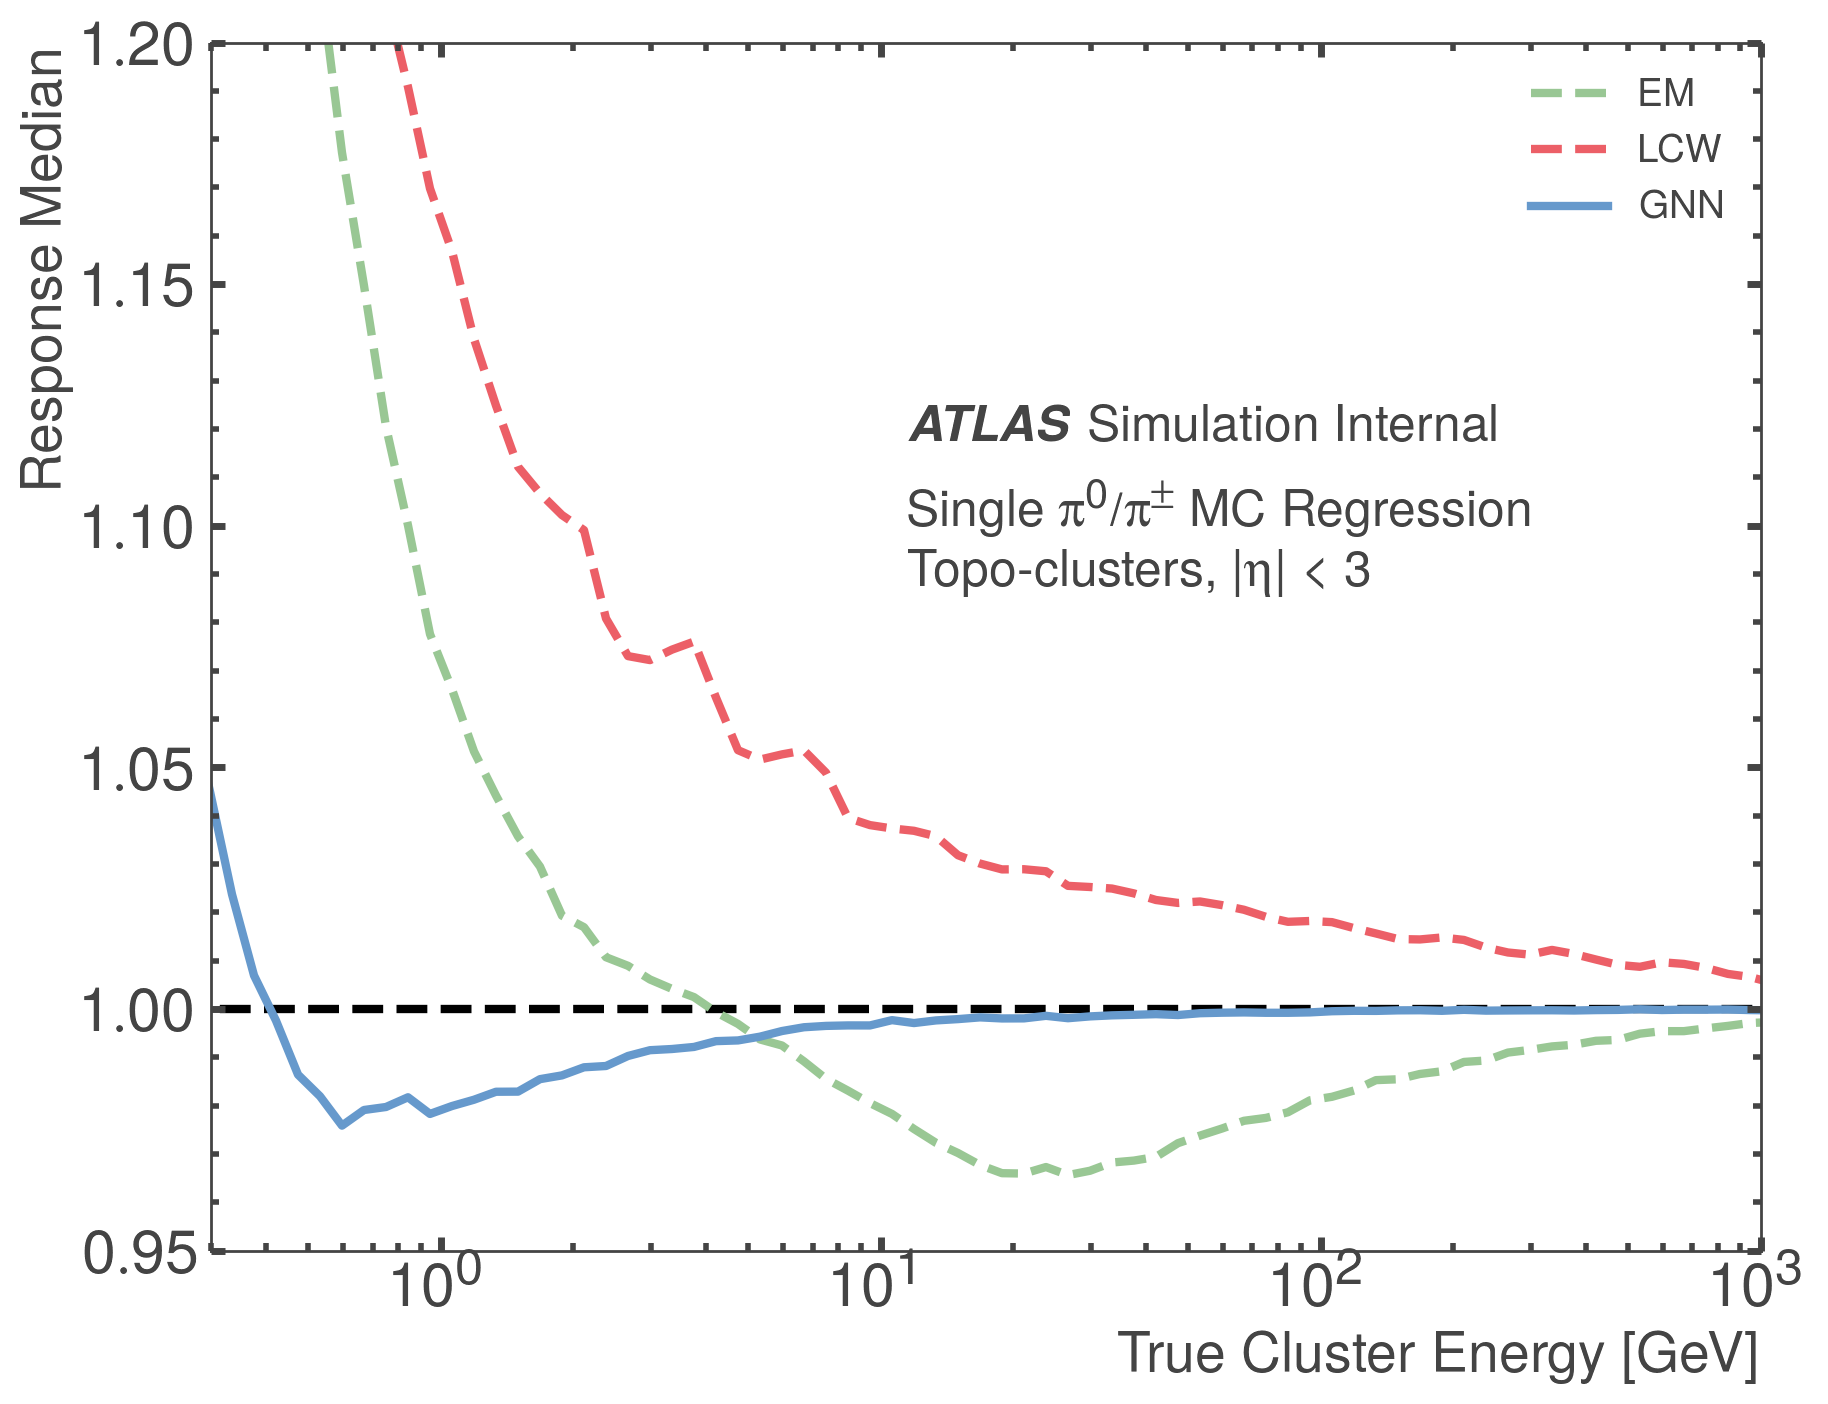

In [2]:
median_gnn = np.load('pub_note_results/response_medians_gnn_clusteronly.npz')
median_em =  np.load('pub_note_results/response_medians_clusteronly_em.npz')
median_lcw =  np.load('pub_note_results/response_medians_clusteronly_lcw.npz')

from scipy.signal import savgol_filter # for smoothing the PFN results due to stats difference

xcenter = median_gnn['xcenter']
median_2 = [
    median_em['response_median'][0,:],
    median_lcw['response_median'][0,:],
    median_gnn['response_median'][0,:],
      ]
labels=['EM', 'LCW', 'GNN',]

### Response medians 
pu.lineOverlay(xcenter=xcenter, lines=median_2,  
            labels=labels,
            xlabel = 'True Cluster Energy [GeV]', ylabel = 'Response Median',
            figfile = 'pub_note_results/regress_response_medians_all_clusteronly.pdf',
            y_max=1.2, y_min=.95, 
               x_min = .3, 
               colorgrouping=0,
            extra_lines= [[[0, 10e3], [1, 1]]],
            linestyles = ['dashed', 'dashed', 'solid', 'solid', 'solid', 'solid'],
            atlas_x = 0.45, atlas_y = 0.7, simulation = True,
            textlist = [{'x': 0.45, 'y': 0.6, 'text': 'Single $\pi^0/\pi^{\pm}$ MC Regression'},
                        {'x': 0.45, 'y': 0.55,  'text': 'Topo-clusters, |$\eta$| < 3'},])

['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 1600x1200 with 0 Axes>

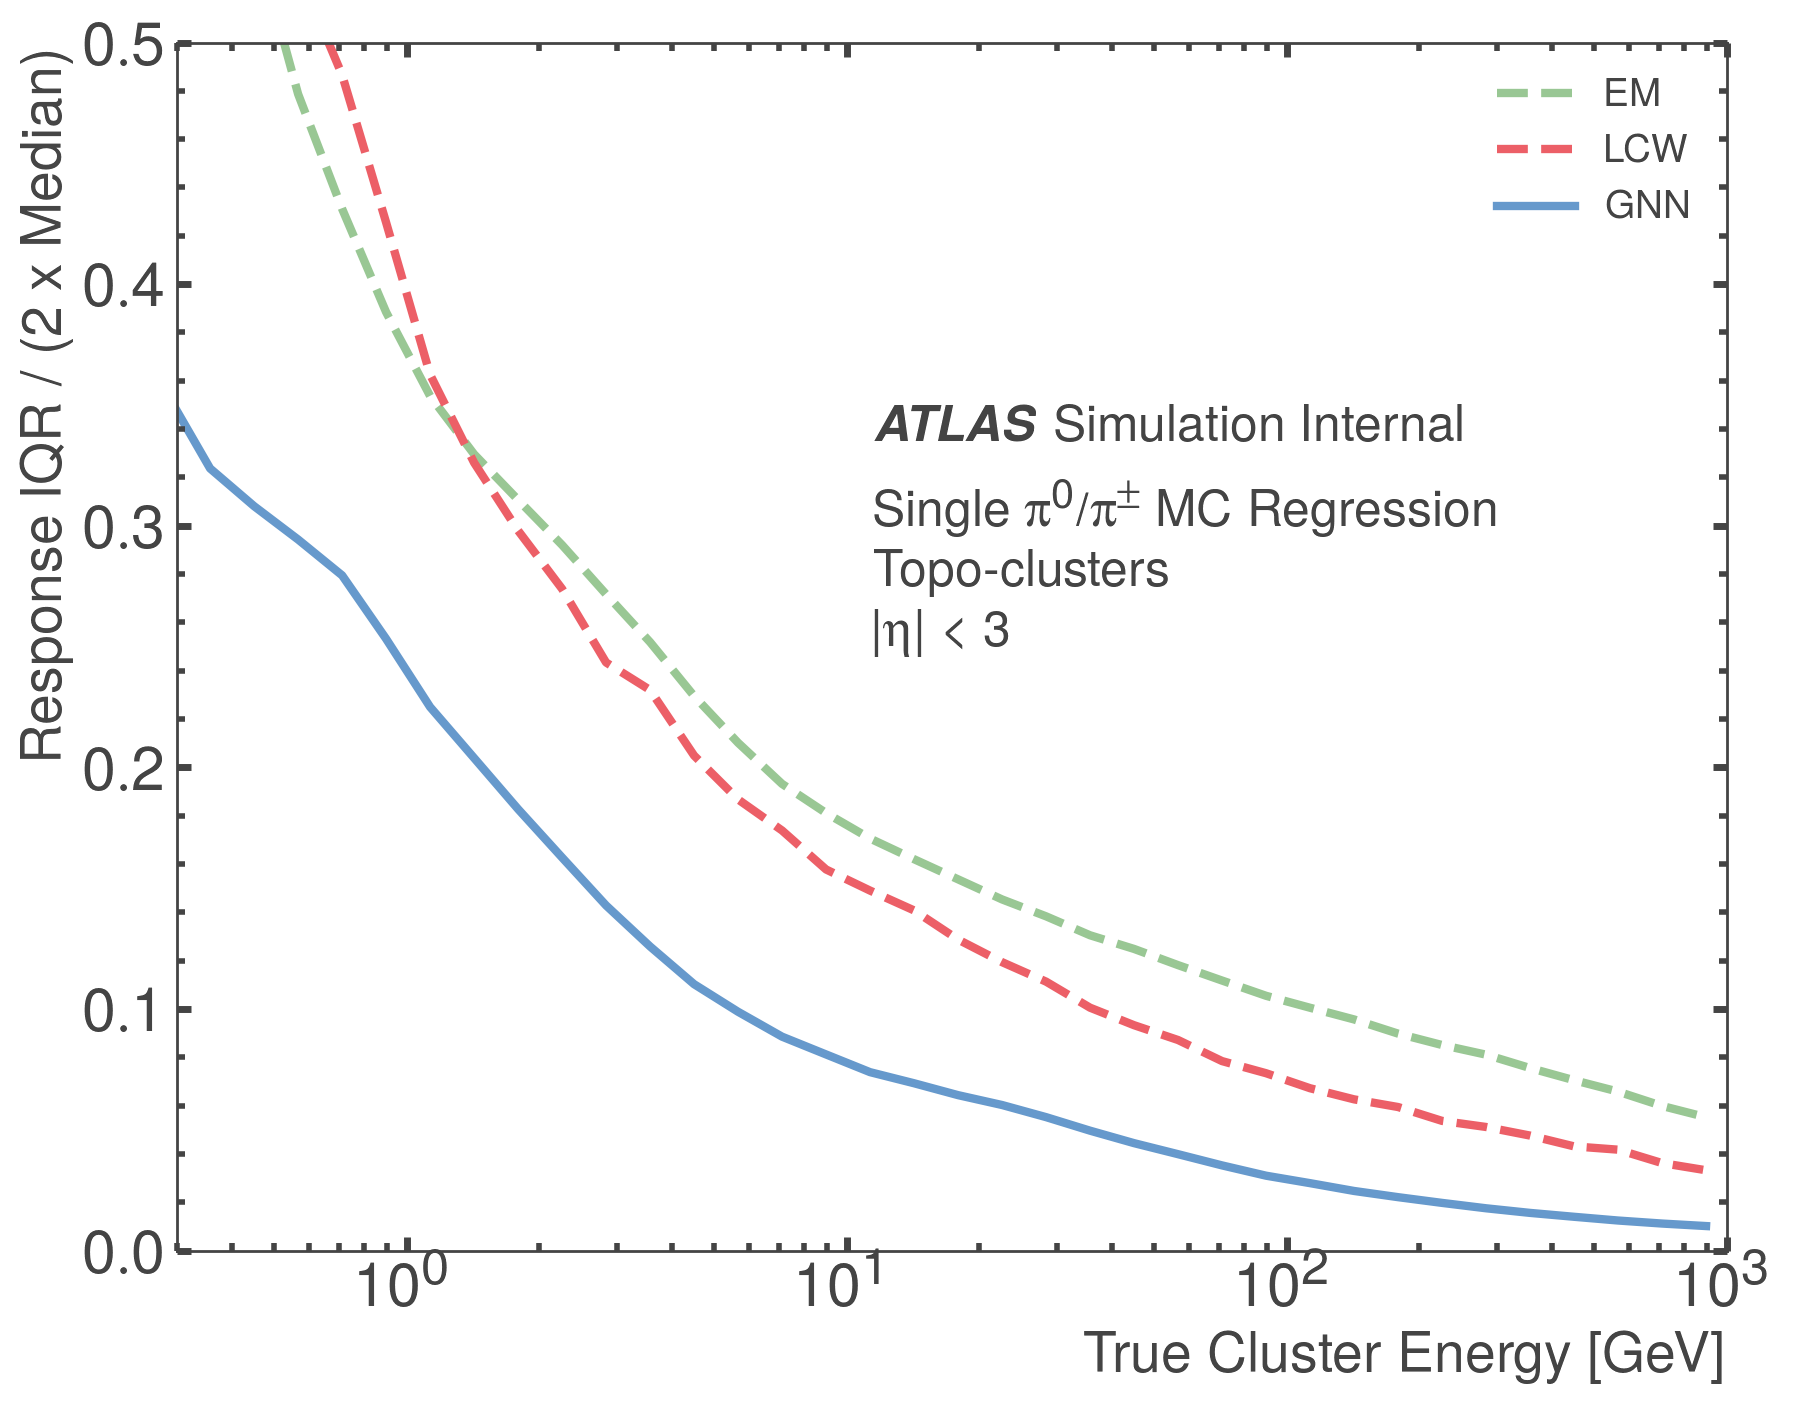

In [3]:
iqr_gnn = np.load('pub_note_results/iqr_gnn_clusteronly.npz')
iqr_pfn = np.load('pub_note_results/iqr_pfn_clusteronly.npz')
iqr_em =  np.load('pub_note_results/iqr_clusteronly_em.npz')
iqr_lcw =  np.load('pub_note_results/iqr_clusteronly_lcw.npz')

from scipy.signal import savgol_filter # for smoothing the PFN results due to stats difference

xcenter = iqr_gnn['xcenter']

iqr_2 = [
    iqr_em['iqr'][0,:],
    iqr_lcw['iqr'][0,:],
    iqr_gnn['iqr'][0,:],
      ]

labels=['EM', 'LCW', 'GNN', ]

pu.lineOverlay(xcenter=xcenter, lines = iqr_2,  
            labels = labels,
            xlabel = 'True Cluster Energy [GeV]', ylabel = 'Response IQR / (2 x Median)',
            y_max = 0.5,  
               x_min = .3,
            linestyles = ['dashed','dashed','solid','solid','solid','solid'],  
            atlas_x = 0.45, atlas_y = 0.7, simulation = True,
            textlist = [{'x': 0.45, 'y': 0.6, 'text': 'Single $\pi^0/\pi^{\pm}$ MC Regression'},
                        {'x': 0.45, 'y': 0.55,  'text': 'Topo-clusters'},
                        {'x': 0.45, 'y': 0.5, 'text': '|$\eta$| < 3'}],
              figfile='pub_note_results/regress_cluster_only_iqr_all.pdf'
              )

### Neutral pions 

extra_line [[0, 10000.0], [1, 1]]
['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 1600x1200 with 0 Axes>

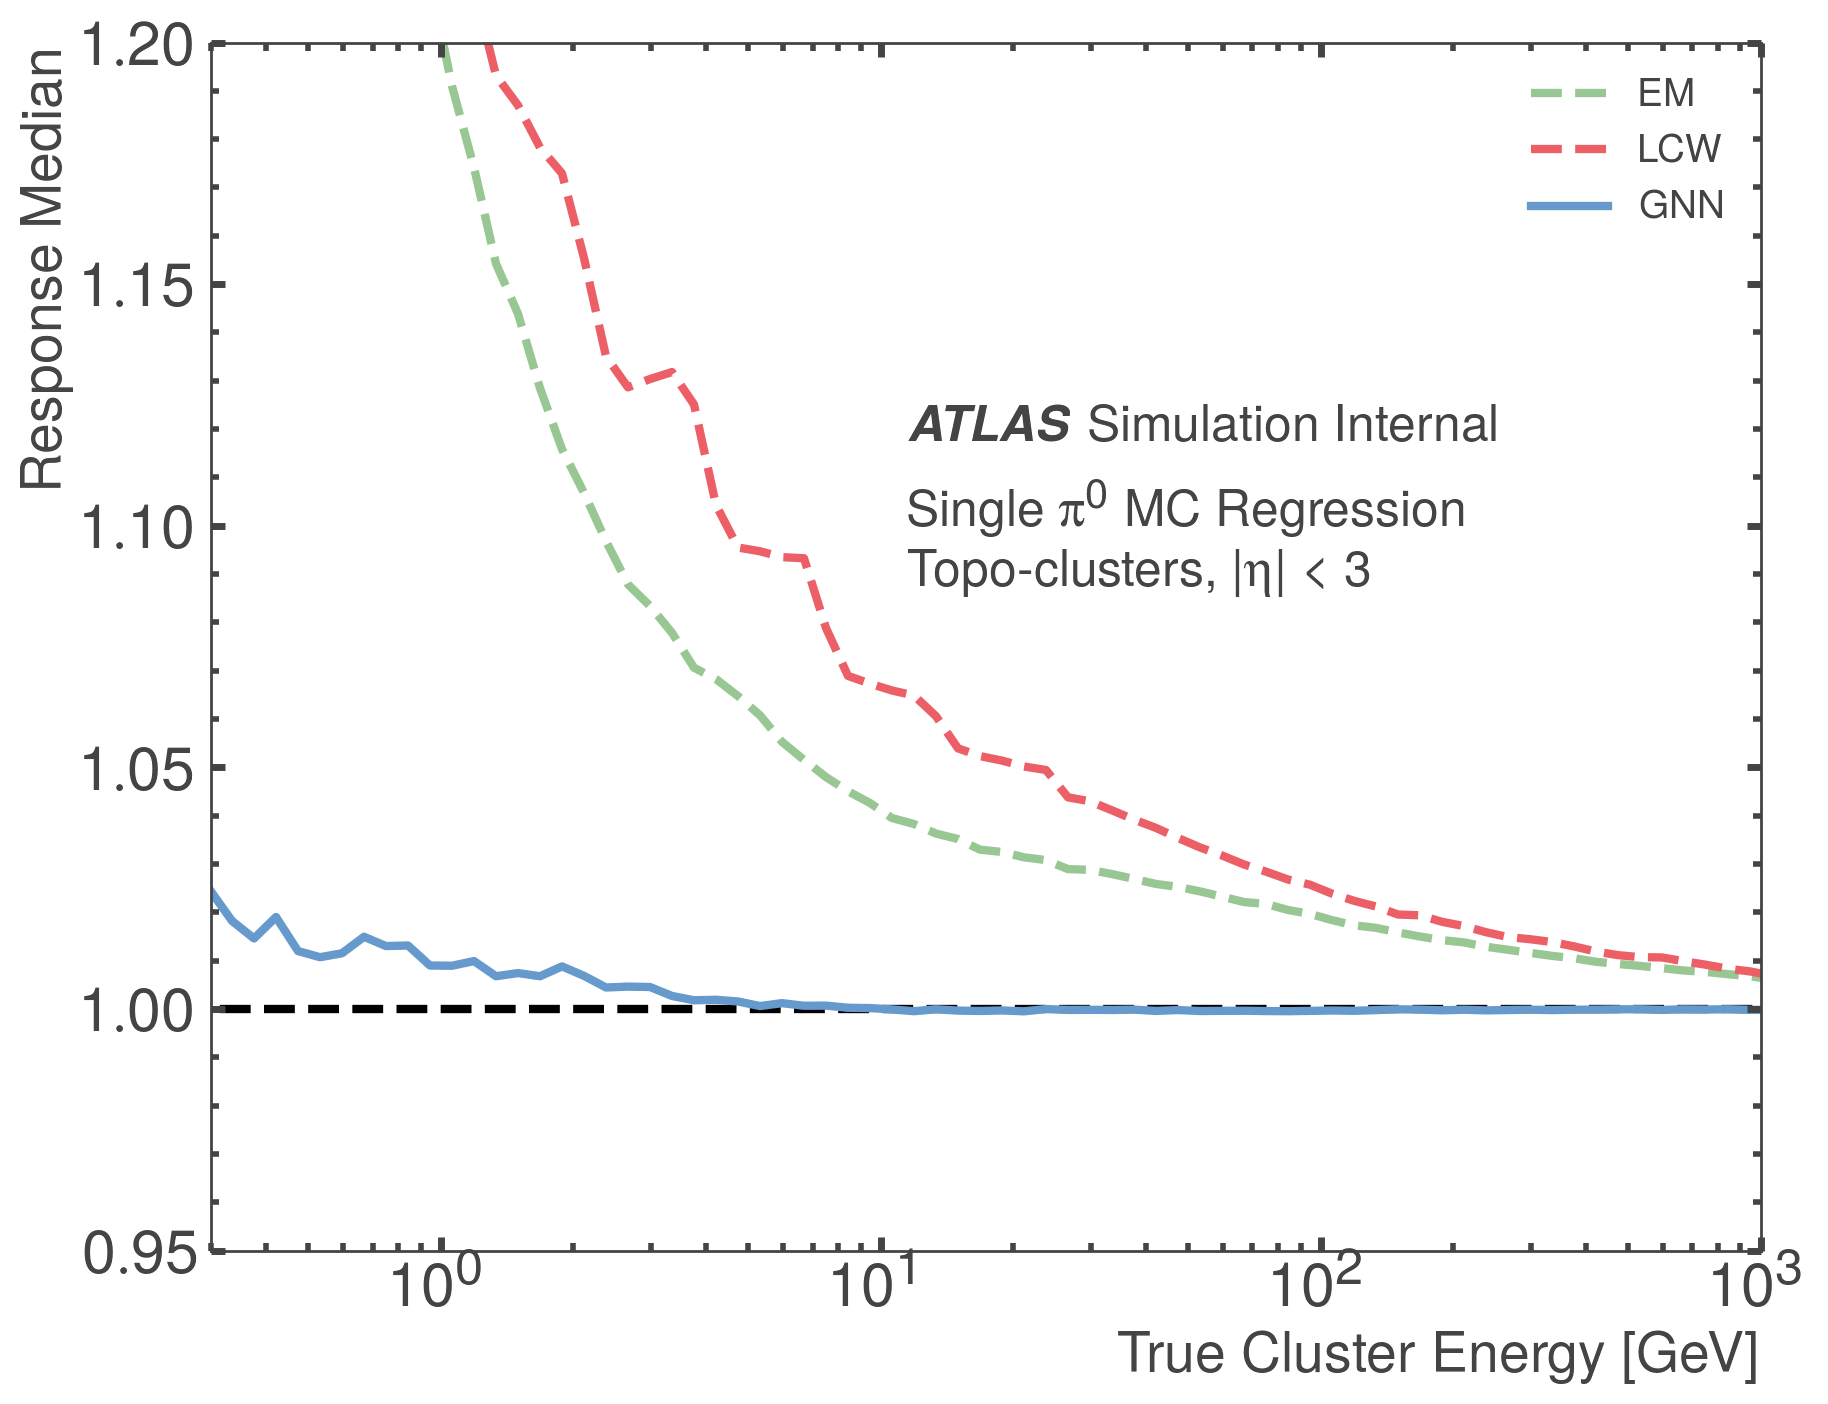

In [4]:
median_gnn = np.load('pub_note_results/response_medians_gnn_clusteronly.npz')
median_em =  np.load('pub_note_results/response_medians_clusteronly_em.npz')
median_lcw =  np.load('pub_note_results/response_medians_clusteronly_lcw.npz')

from scipy.signal import savgol_filter # for smoothing the PFN results due to stats difference

xcenter = median_gnn['xcenter']
median_2 = [
    median_em['response_median'][1,:],
    median_lcw['response_median'][1,:],
    median_gnn['response_median'][1,:],
      ]
labels=['EM', 'LCW', 'GNN',]

### Response medians 
pu.lineOverlay(xcenter=xcenter, lines=median_2,  
            labels=labels,
            xlabel = 'True Cluster Energy [GeV]', ylabel = 'Response Median',
            figfile = 'pub_note_results/regress_response_medians_pi0_clusteronly.pdf',
            y_max=1.2, y_min=.95, 
               x_min = .3, 
               colorgrouping=0,
            extra_lines= [[[0, 10e3], [1, 1]]],
            linestyles = ['dashed', 'dashed', 'solid', 'solid', 'solid', 'solid'],
            atlas_x = 0.45, atlas_y = 0.7, simulation = True,
            textlist = [{'x': 0.45, 'y': 0.6, 'text': 'Single $\pi^0$ MC Regression'},
                        {'x': 0.45, 'y': 0.55,  'text': 'Topo-clusters, |$\eta$| < 3'},
                       ])

['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 1600x1200 with 0 Axes>

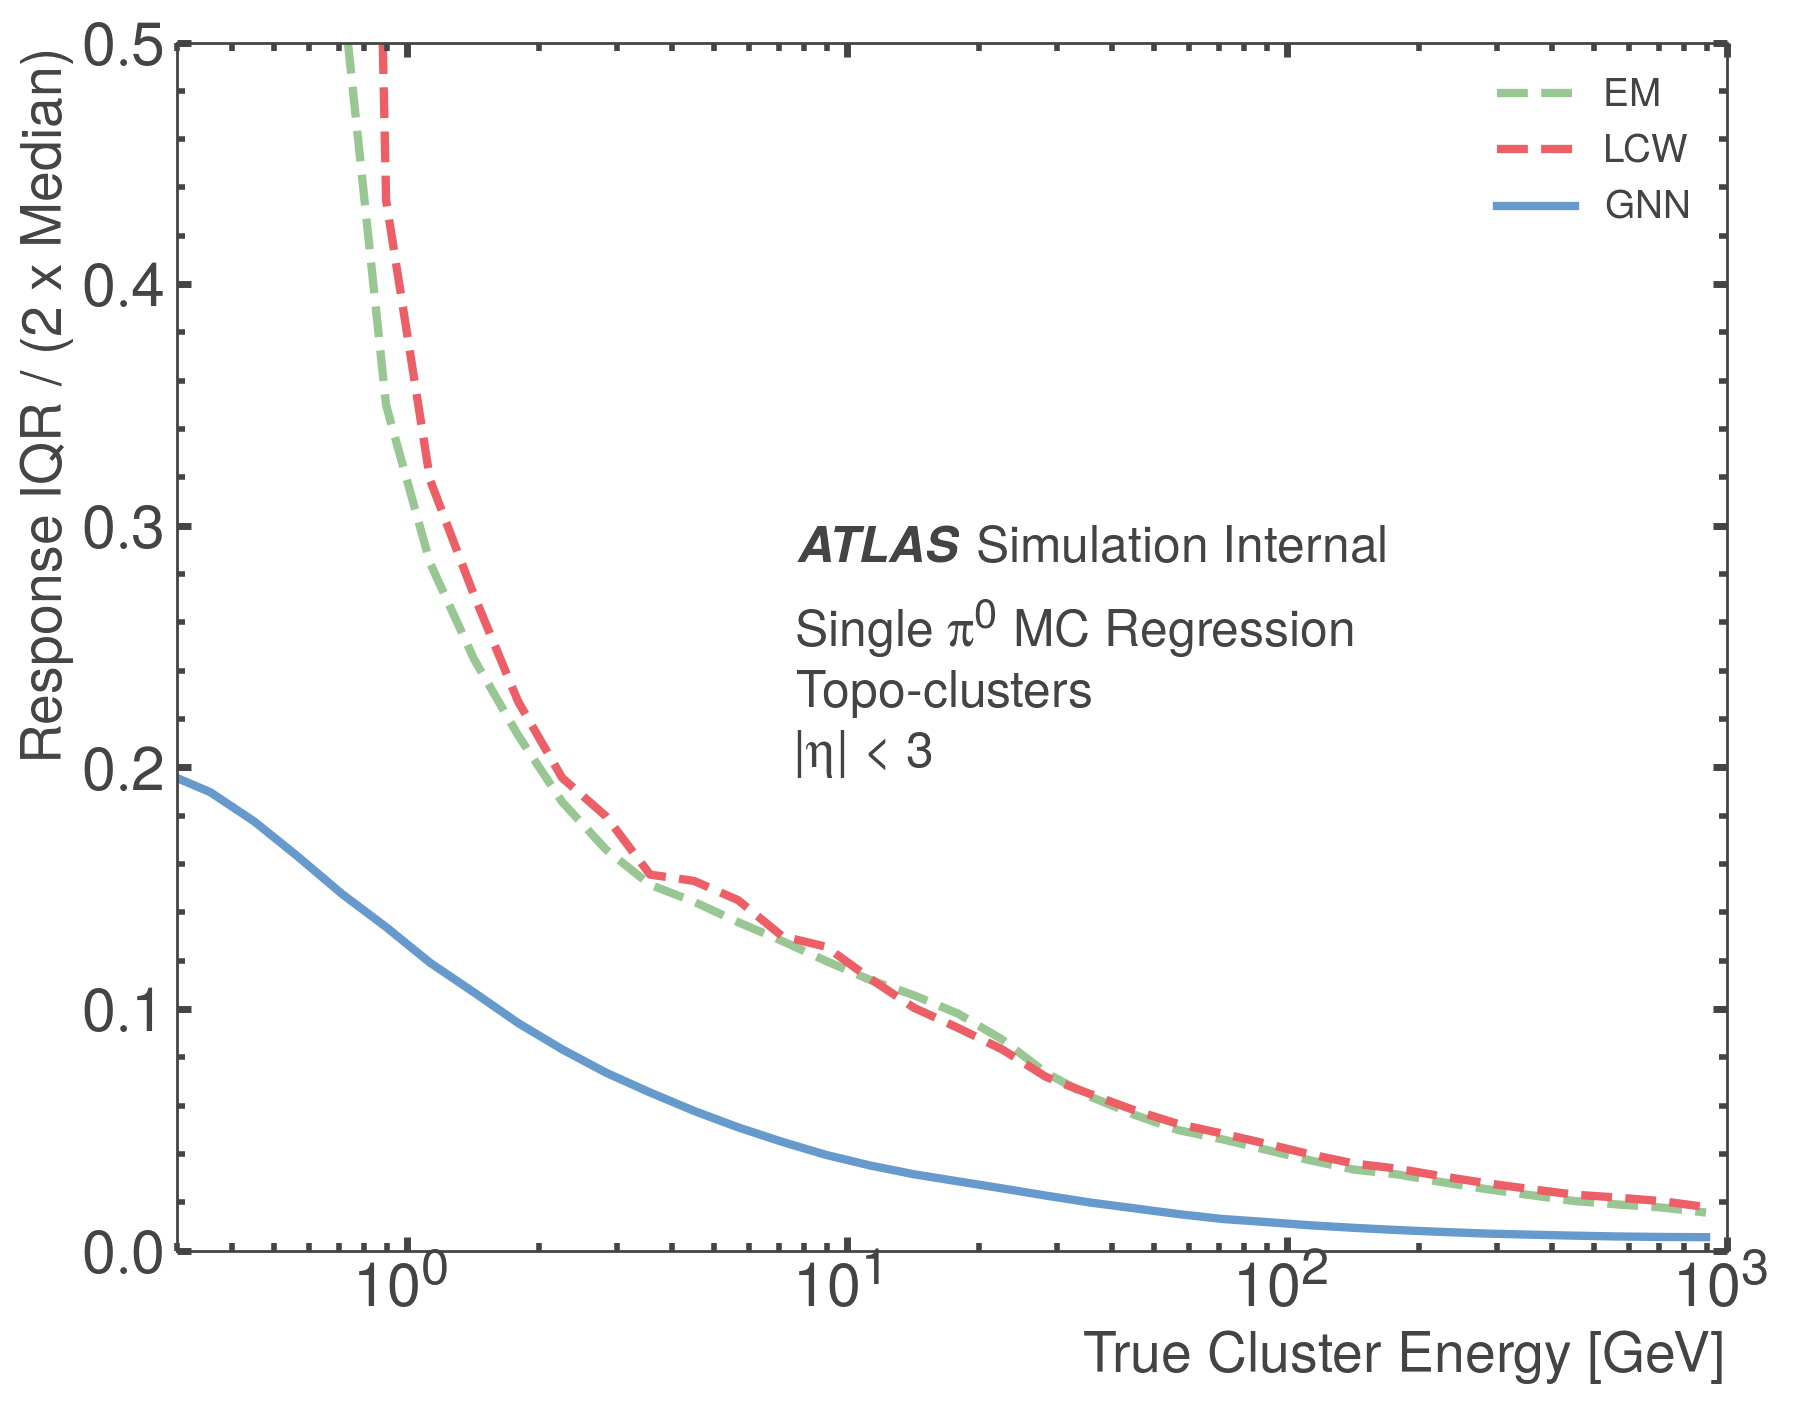

In [5]:
iqr_gnn = np.load('pub_note_results/iqr_gnn_clusteronly.npz')
iqr_pfn = np.load('pub_note_results/iqr_pfn_clusteronly.npz')
iqr_em =  np.load('pub_note_results/iqr_clusteronly_em.npz')
iqr_lcw =  np.load('pub_note_results/iqr_clusteronly_lcw.npz')

from scipy.signal import savgol_filter # for smoothing the PFN results due to stats difference

xcenter = iqr_gnn['xcenter']

iqr_2 = [
    iqr_em['iqr'][1,:],
    iqr_lcw['iqr'][1,:],
    iqr_gnn['iqr'][1,:],
      ]

labels=['EM', 'LCW', 'GNN', ]

pu.lineOverlay(xcenter=xcenter, lines = iqr_2,  
            labels = labels,
            xlabel = 'True Cluster Energy [GeV]', ylabel = 'Response IQR / (2 x Median)',
            y_max = 0.5,  
               x_min = .3,
            linestyles = ['dashed','dashed','solid','solid','solid','solid'],  
            atlas_x = 0.4, atlas_y = 0.6, simulation = True,
            textlist = [{'x': 0.4, 'y': 0.5, 'text': 'Single $\pi^{0}$ MC Regression'},
                        {'x': 0.4, 'y': 0.45,  'text': 'Topo-clusters'},
                       {'x': 0.4, 'y': 0.4, 'text': '|$\eta$| < 3'}],
              figfile='pub_note_results/regress_cluster_only_iqr_pi0.pdf'
              )

### Charged pions 

extra_line [[0, 10000.0], [1, 1]]
['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 1600x1200 with 0 Axes>

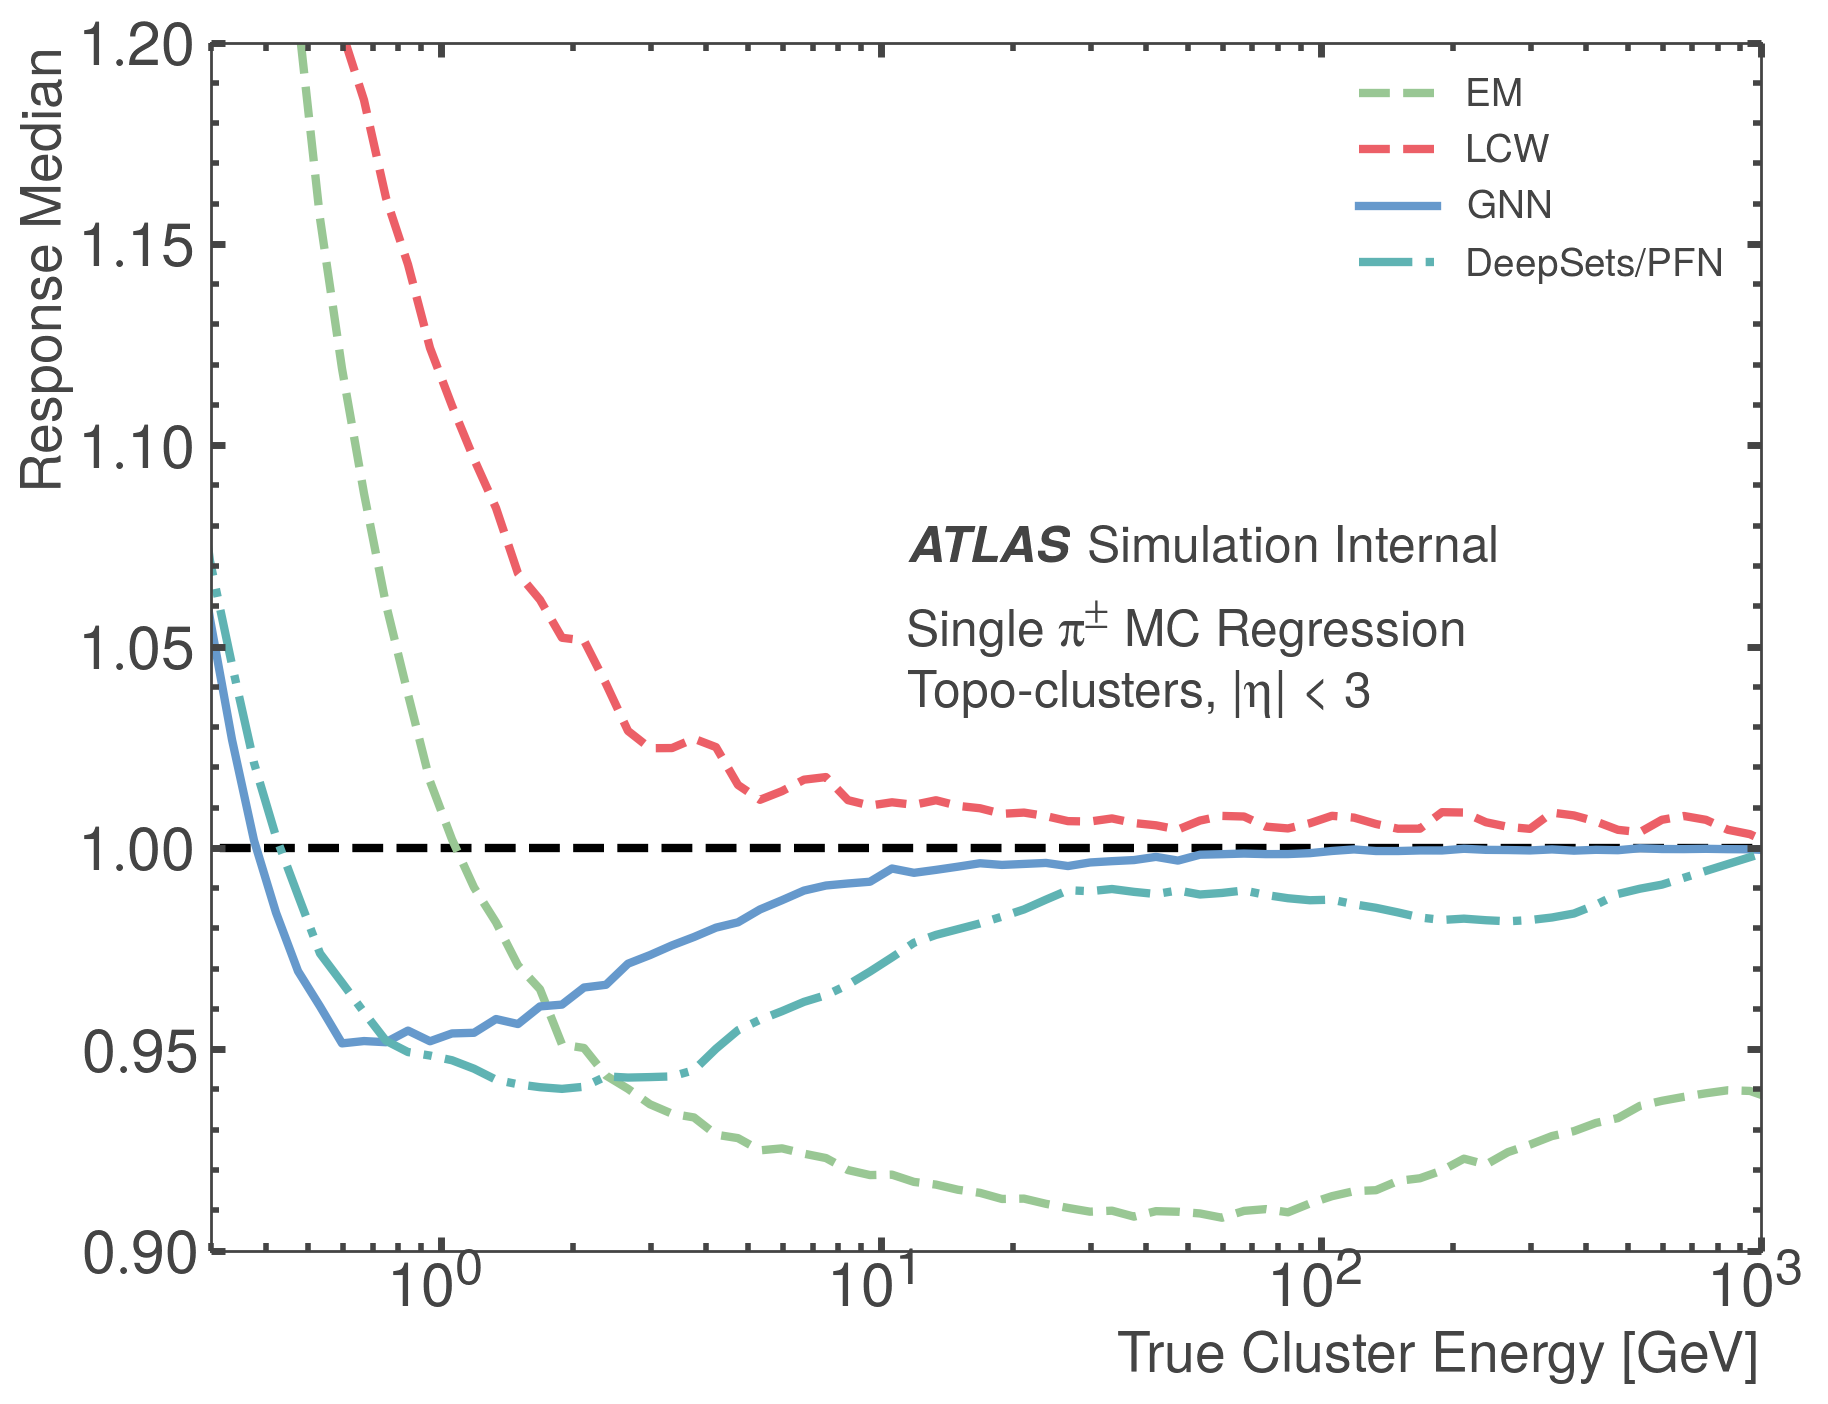

In [6]:
median_gnn = np.load('pub_note_results/response_medians_gnn_clusteronly.npz')
median_pfn = np.load('pub_note_results/response_medians_pfn_clusteronly.npz')
median_em =  np.load('pub_note_results/response_medians_clusteronly_em.npz')
median_lcw =  np.load('pub_note_results/response_medians_clusteronly_lcw.npz')

from scipy.signal import savgol_filter # for smoothing the PFN results due to stats difference

xcenter = median_gnn['xcenter']
median_2 = [
    median_em['response_median'][2,:],
    median_lcw['response_median'][2,:],
    median_gnn['response_median'][2,:],
#     median_pfn['response_median'][0,:],
    savgol_filter(median_pfn['response_median'][0,:], 11, 1), # window size = 11, polynomial order 1
      ]
labels=['EM', 'LCW', 'GNN', 'DeepSets/PFN',]

### Response medians 
pu.lineOverlay(xcenter=xcenter, lines=median_2,  
            labels=labels,
            xlabel = 'True Cluster Energy [GeV]', ylabel = 'Response Median',
            figfile = 'pub_note_results/regress_response_medians_pipm_clusteronly.pdf',
            y_max=1.2, y_min=.9, 
               x_min = .3, 
               colorgrouping=0,
            extra_lines= [[[0, 10e3], [1, 1]]],
            linestyles = ['dashed', 'dashed', 'solid', '-.', 'solid', 'solid'],
            atlas_x = 0.45, atlas_y = 0.6, simulation = True,
            textlist = [{'x': 0.45, 'y': 0.5, 'text': 'Single $\pi^\pm$ MC Regression'},
                        {'x': 0.45, 'y': 0.45,  'text': 'Topo-clusters, |$\eta$| < 3'},
                       ])

['on:green', 'on:red', 'on:blue', 'on:cyan', 'on:orange', 'on:pink', 'on:yellow']


<Figure size 1600x1200 with 0 Axes>

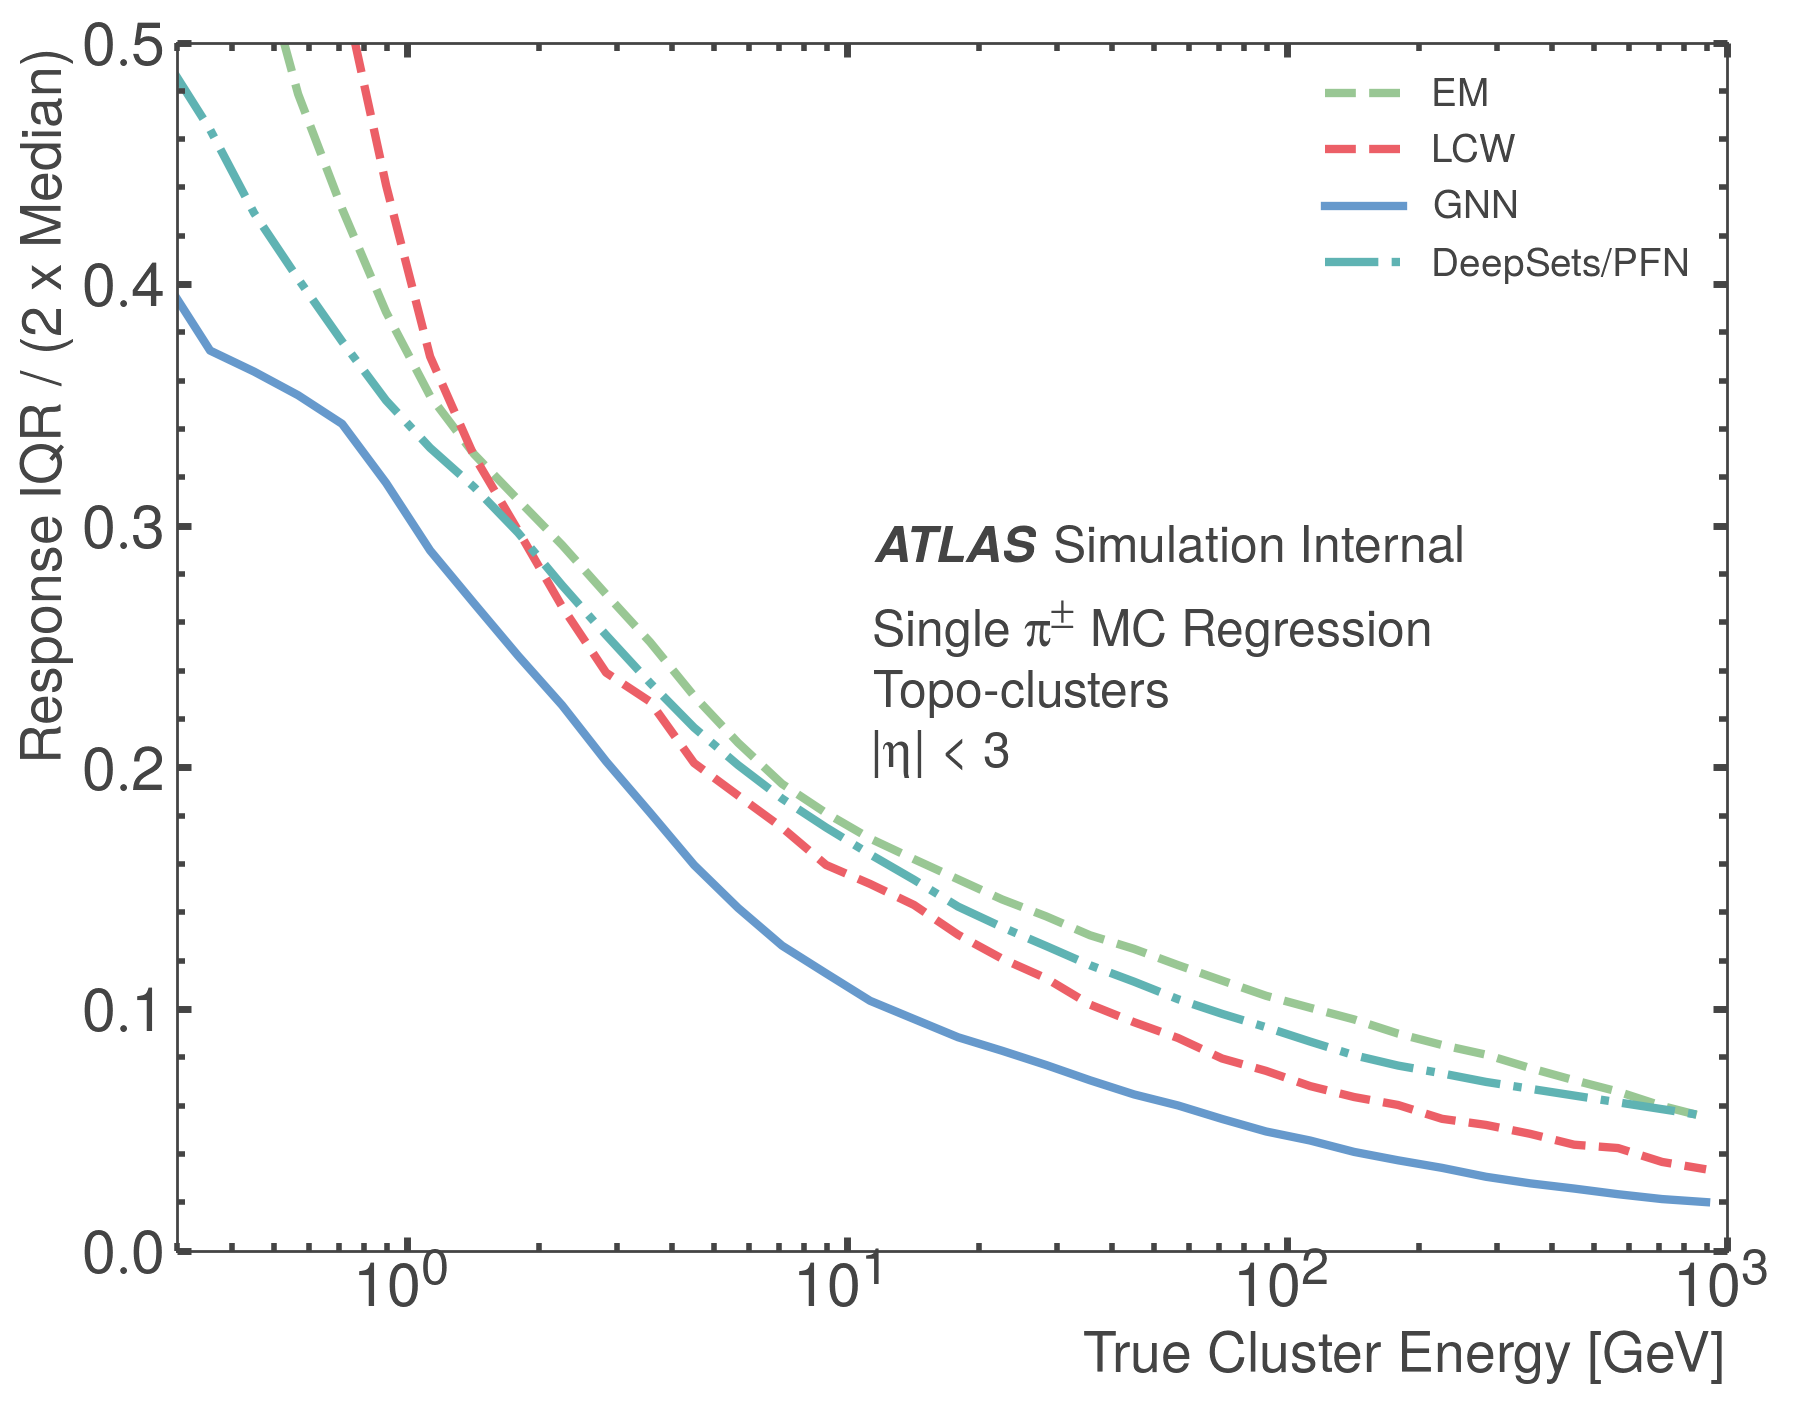

In [7]:
iqr_gnn = np.load('pub_note_results/iqr_gnn_clusteronly.npz')
iqr_pfn = np.load('pub_note_results/iqr_pfn_clusteronly.npz')
iqr_em =  np.load('pub_note_results/iqr_clusteronly_em.npz')
iqr_lcw =  np.load('pub_note_results/iqr_clusteronly_lcw.npz')

from scipy.signal import savgol_filter # for smoothing the PFN results due to stats difference

xcenter = iqr_gnn['xcenter']

### 3rd row is the charged pion for most of these
iqr_2 = [
    iqr_em['iqr'][2,:],
    iqr_lcw['iqr'][2,:],
    iqr_gnn['iqr'][2,:],
#     iqr_pfn['iqr'][0,:],
    savgol_filter(iqr_pfn['iqr'][0,:], 11, 1), # window size = 11, polynomial order 1
      ]

labels=['EM', 'LCW', 'GNN', 'DeepSets/PFN', ]

pu.lineOverlay(xcenter=xcenter, lines = iqr_2,  
            labels = labels,
            xlabel = 'True Cluster Energy [GeV]', ylabel = 'Response IQR / (2 x Median)',
            y_max = 0.5,  
               x_min = .3,
            linestyles = ['dashed','dashed','solid','-.','solid','solid'],  
            atlas_x = 0.45, atlas_y = 0.6, simulation = True,
            textlist = [{'x': 0.45, 'y': 0.5, 'text': 'Single $\pi^{\pm}$ MC Regression'},
                        {'x': 0.45, 'y': 0.45,  'text': 'Topo-clusters'},
                        {'x': 0.45, 'y': 0.4, 'text': '|$\eta$| < 3'}],
              figfile='pub_note_results/regress_cluster_only_iqr_pion.pdf'
              )

# Clusters + Tracks

In [6]:
median_dnn['response_median'].shape

(40,)

extra_line [[0, 10000.0], [1, 1]]


<Figure size 1600x1200 with 0 Axes>

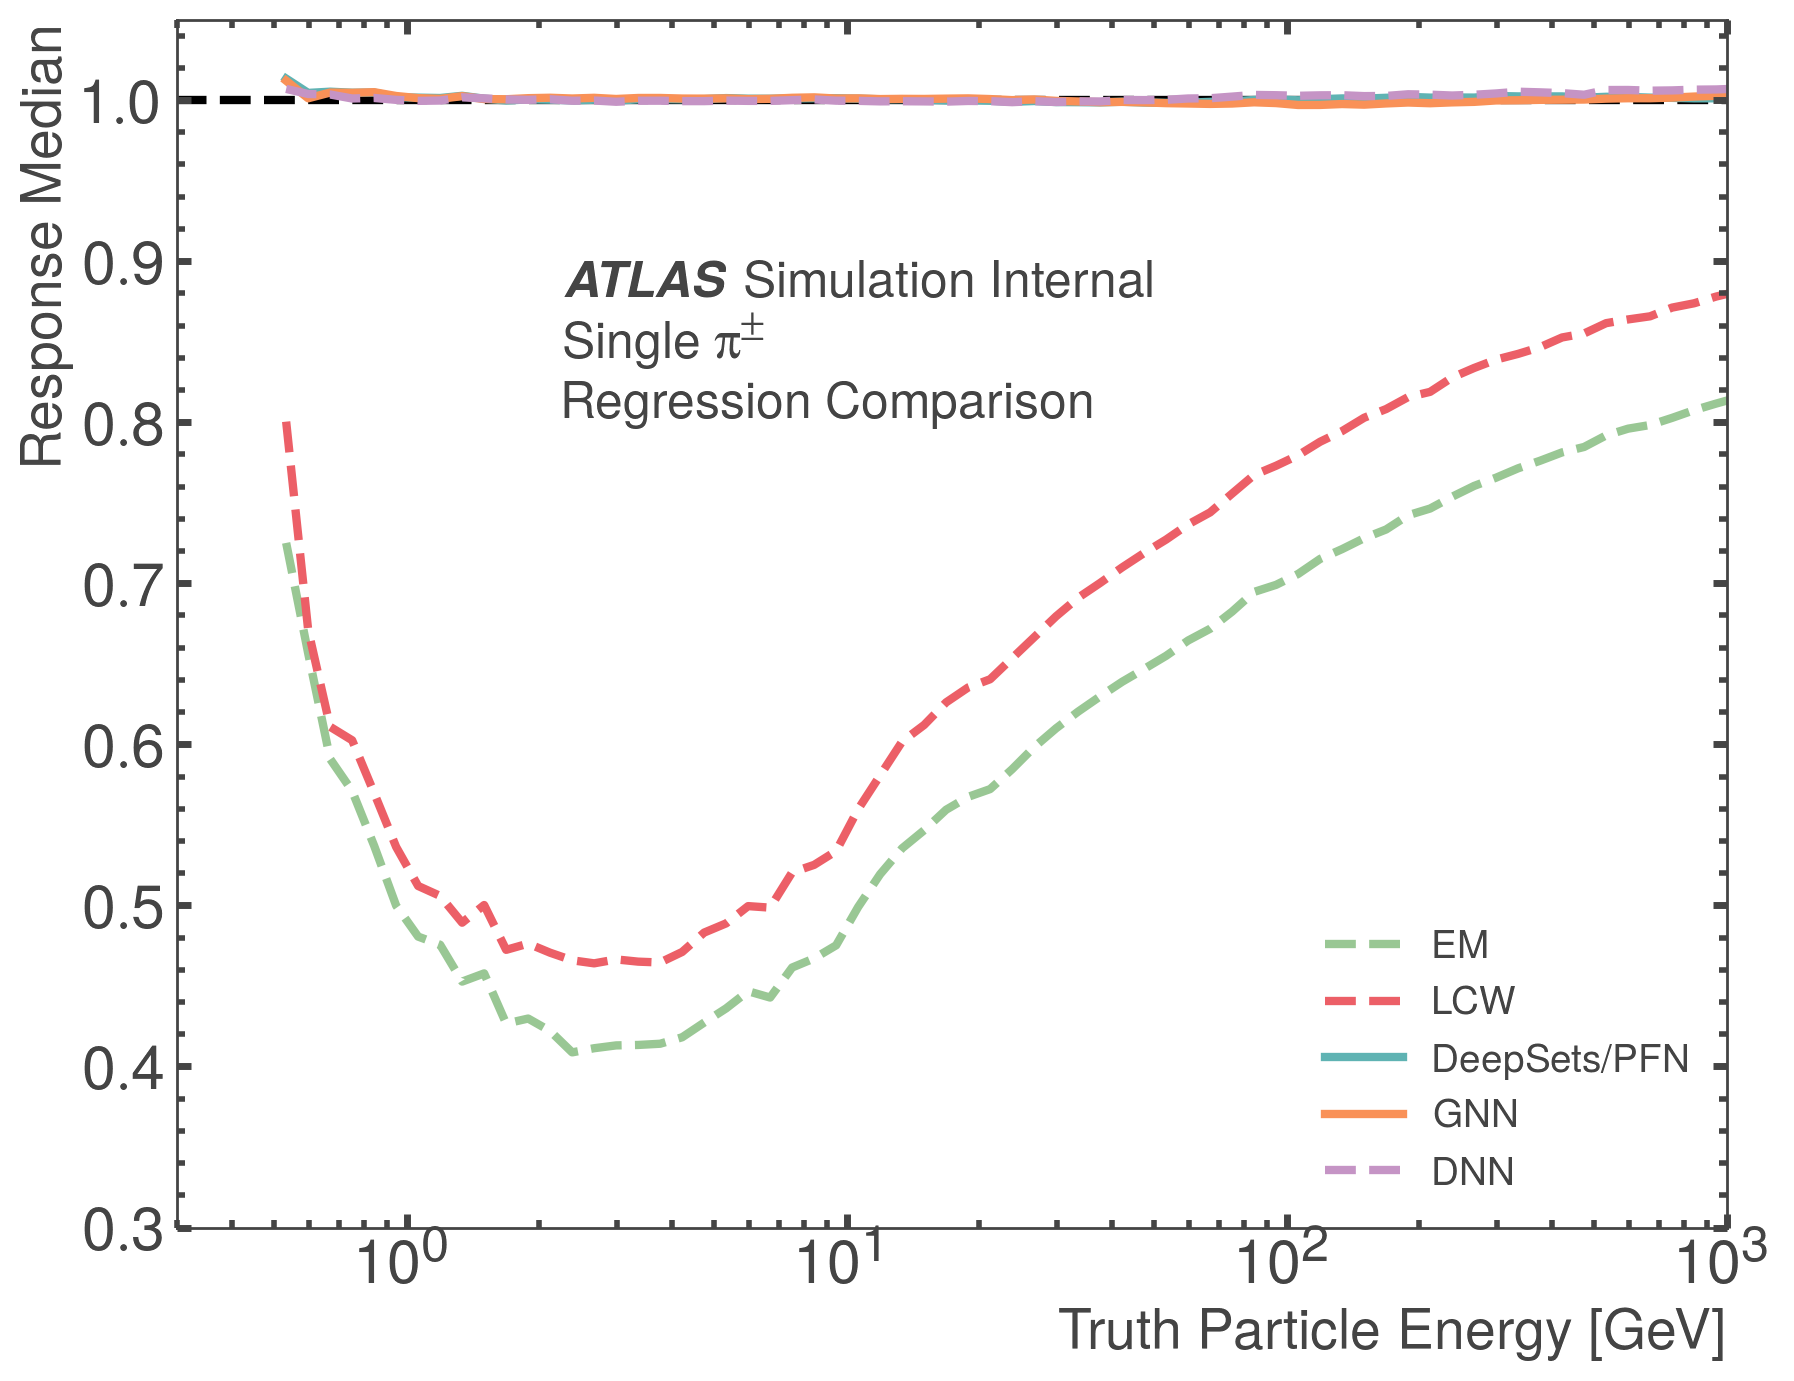

In [17]:
median_em =  np.load('pub_note_results/response_medians_em.npz')
median_lcw =  np.load('pub_note_results/response_medians_lcw.npz')
median_transformer = np.load('pub_note_results/response_medians_transformer_large.npz')
median_dnn = np.load('pub_note_results/response_median_dnn_test.npz')
# median_dnn = np.load('pub_note_results/response_medians_dnn_2.npz')
median_gnn = np.load('pub_note_results/response_medians_gnn_allclusters_cells.npz')
# median_pfn = np.load('pub_note_results/response_medians_pfn.npz') # Russell
median_pfn = np.load('pub_note_results/response_medians_deepsets_allclusters_cells.npz') # Piyush

xcenter = median_em['xcenter']

medians = [
    median_em['response_median'][0,:],
    median_lcw['response_median'][0,:],
    # median_transformer['response_median'][0,:],
    median_pfn['response_median'][0,:],
    median_gnn['response_median'][0,:],
    median_dnn['response_median'],
      ]

labels=[
    'EM', 'LCW', 
    # 'Transformer', 
    'DeepSets/PFN', 
        'GNN', 
        'DNN',
       ]

colors = ['on:green', 'on:red', 
          # 'on:blue', 
          'on:cyan', 'on:orange', 'on:pink', 'darkslategray', 'tab:olive']


### Response medians 
pu.lineOverlay(xcenter=xcenter, lines=medians,  
            labels=labels,
            xlabel = 'Truth Particle Energy [GeV]', ylabel = 'Response Median',
            figfile = 'pub_note_results/regress_response_medians.pdf',
            y_max=1.05, y_min=.3, 
               x_min = .3, 
               colorgrouping=0,
               colors=colors,
            extra_lines= [[[0, 10e3], [1, 1]]],
            linestyles = ['dashed', 'dashed', 
                          # 'solid',
                          'solid', 'solid', 'dashed', 'dashed',
                         ], # , 'dashed',],
            atlas_x = 0.25, atlas_y = 0.8, simulation = True,
            textlist = [{'x': 0.25, 'y': 0.72, 'text': 'Single $\pi^{\pm}$'},
                        {'x': 0.25, 'y': 0.67,  'text': 'Regression Comparison'}])

extra_line [[0, 10000.0], [1, 1]]


<Figure size 1600x1200 with 0 Axes>

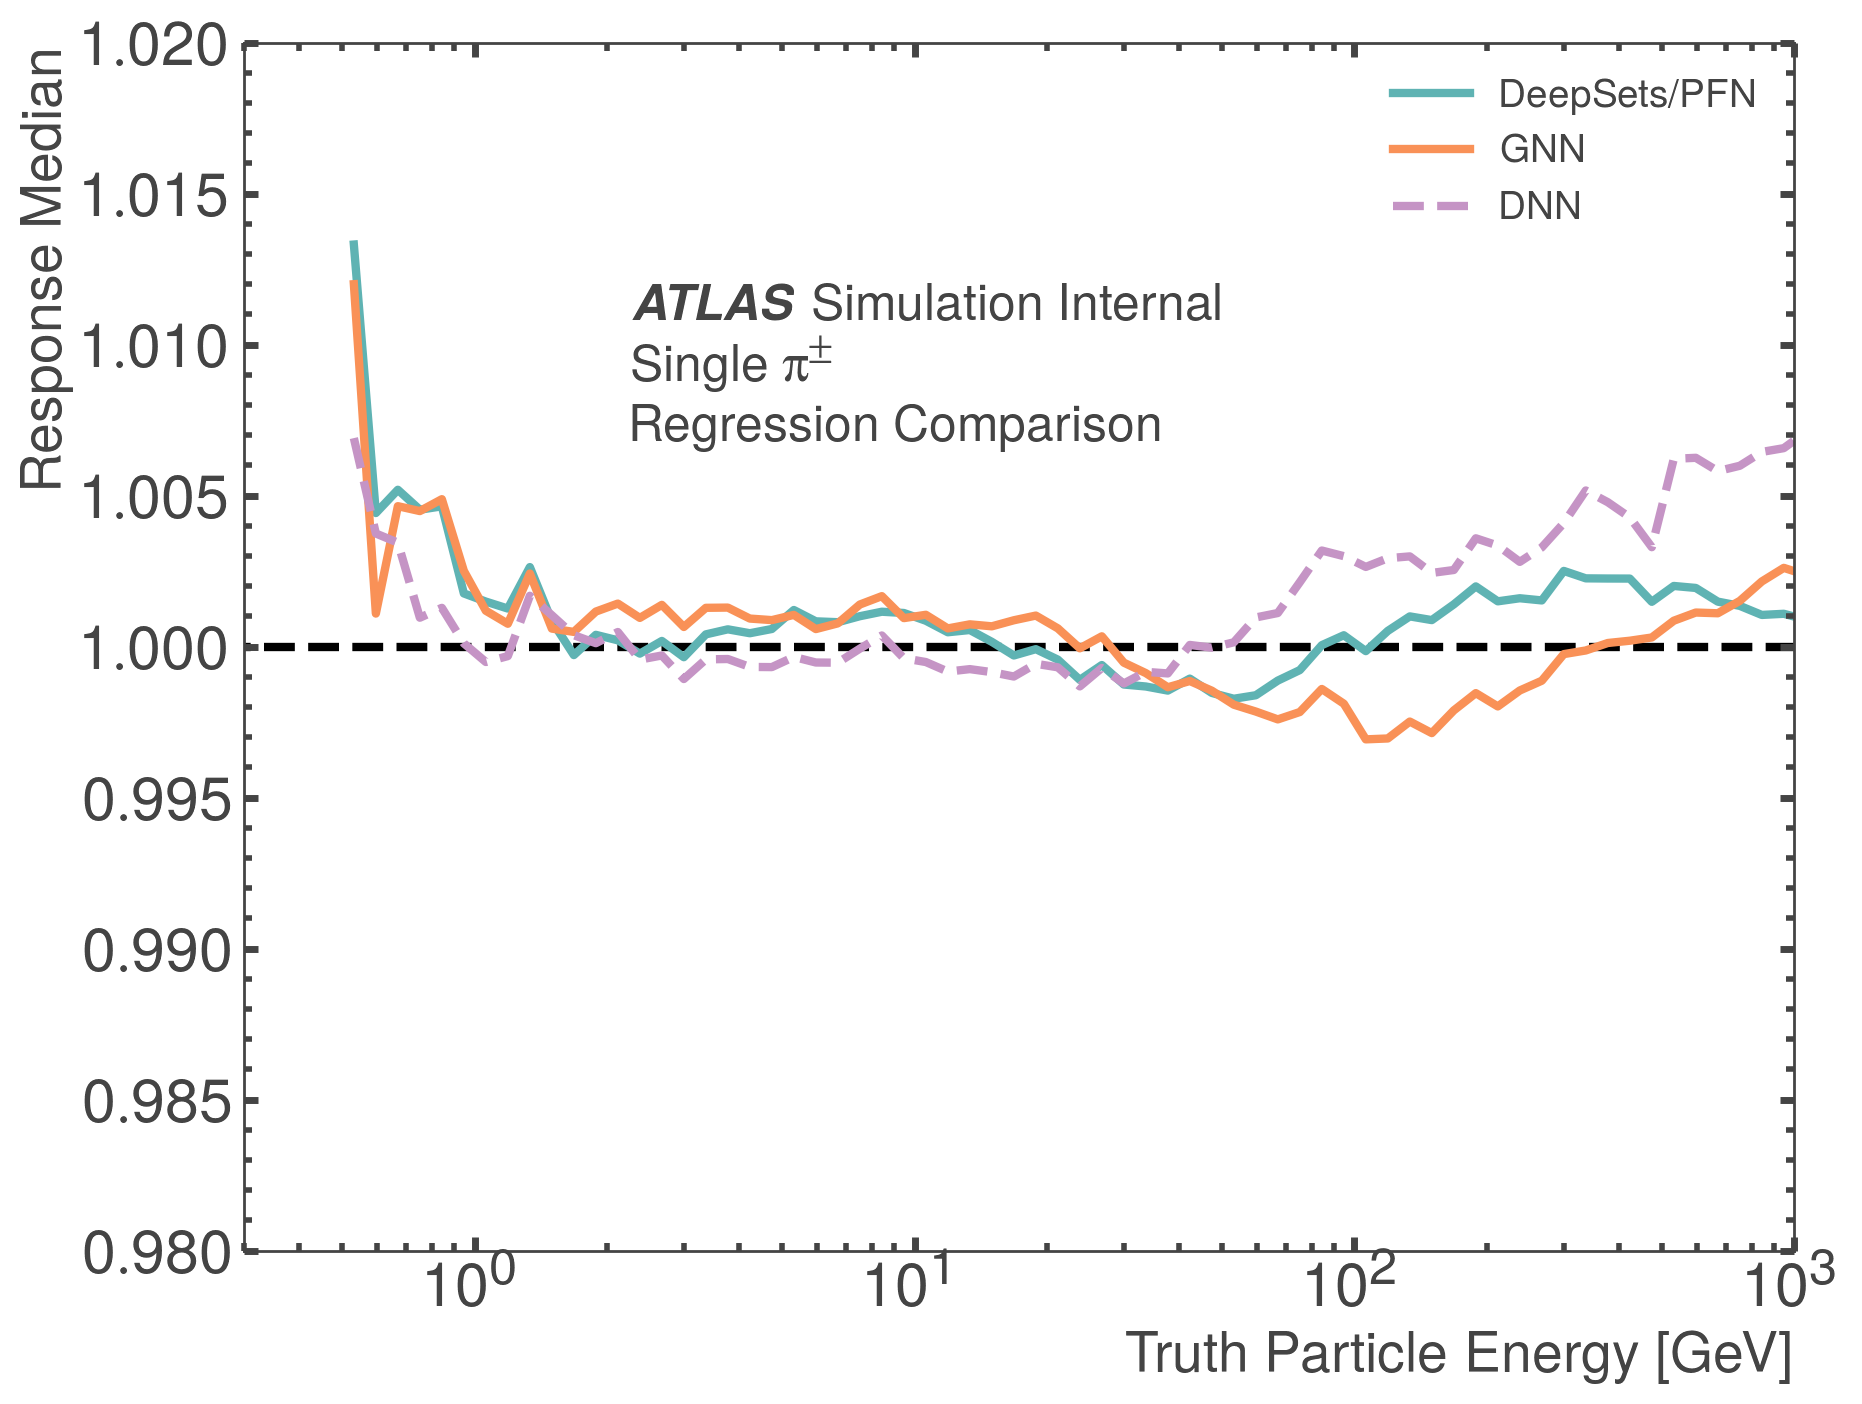

In [22]:
median_em =  np.load('pub_note_results/response_medians_em.npz')
median_lcw =  np.load('pub_note_results/response_medians_lcw.npz')
median_transformer = np.load('pub_note_results/response_medians_transformer_large.npz')
median_dnn = np.load('pub_note_results/response_median_dnn_test.npz')
# median_dnn = np.load('pub_note_results/response_medians_dnn_2.npz')
median_gnn = np.load('pub_note_results/response_medians_gnn_allclusters_cells.npz')
# median_pfn = np.load('pub_note_results/response_medians_pfn.npz') # Russell
median_pfn = np.load('pub_note_results/response_medians_deepsets_allclusters_cells.npz') # Piyush

xcenter = median_em['xcenter']

medians = [
    # median_em['response_median'][0,:],
    # median_lcw['response_median'][0,:],
    # median_transformer['response_median'][0,:],
    median_pfn['response_median'][0,:],
    median_gnn['response_median'][0,:],
    median_dnn['response_median'],
      ]

labels=[
    # 'EM', 'LCW', 
    # 'Transformer', 
    'DeepSets/PFN', 
        'GNN', 
        'DNN',
       ]

colors = [
    # 'on:green', 'on:red', 
          # 'on:blue', 
          'on:cyan', 'on:orange', 'on:pink', 'darkslategray', 'tab:olive']


### Response medians 
pu.lineOverlay(xcenter=xcenter, lines=medians,  
            labels=labels,
            xlabel = 'Truth Particle Energy [GeV]', ylabel = 'Response Median',
            figfile = 'pub_note_results/regress_response_medians_nobaselines.pdf',
            y_max=1.02, y_min=.98, 
               x_min = .3, 
               colorgrouping=0,
               colors=colors,
            extra_lines= [[[0, 10e3], [1, 1]]],
            linestyles = [
                        # 'dashed', 'dashed', 
                          # 'solid',
                          'solid', 'solid', 'dashed', 'dashed',
                         ], # , 'dashed',],
            atlas_x = 0.25, atlas_y = 0.8, simulation = True,
            textlist = [{'x': 0.25, 'y': 0.72, 'text': 'Single $\pi^{\pm}$'},
                        {'x': 0.25, 'y': 0.67,  'text': 'Regression Comparison'}])

<Figure size 1600x1200 with 0 Axes>

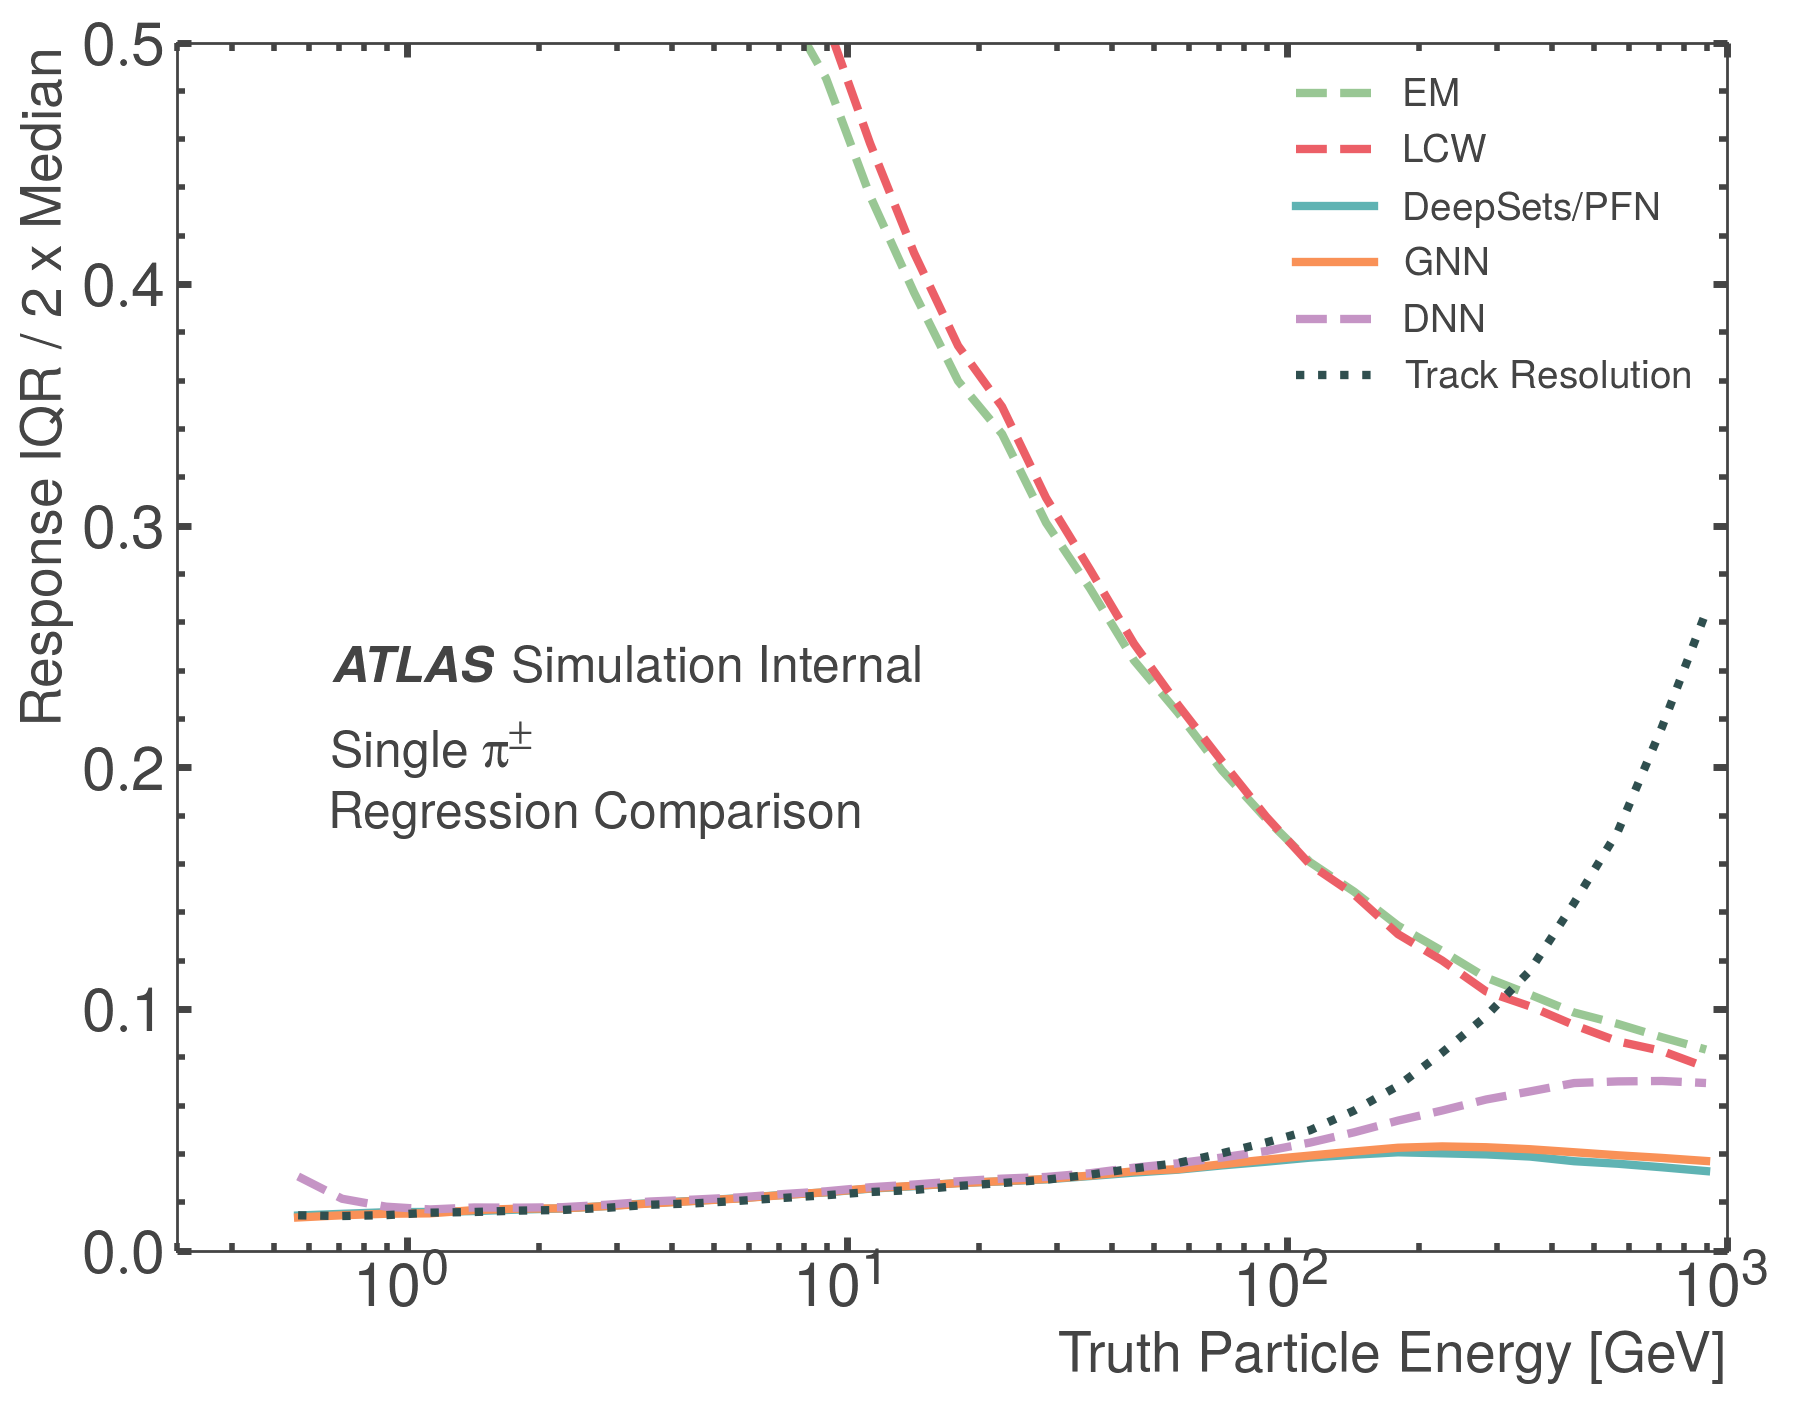

In [19]:
iqr_em =  np.load('pub_note_results/iqr_em.npz')
iqr_lcw =  np.load('pub_note_results/iqr_lcw.npz')
iqr_track = np.load('pub_note_results/iqr_track.npz')
iqr_transformer = np.load('pub_note_results/iqr_transformer_large.npz')
# iqr_pfn = np.load('pub_note_results/iqr_pfn.npz') # Russell
iqr_pfn = np.load('pub_note_results/iqr_deepsets_allclusters_cells.npz') # Piyush
iqr_gnn = np.load('pub_note_results/iqr_gnn_allclusters_cells.npz')
iqr_dnn = np.load('pub_note_results/iqr_dnn_test.npz')
# iqr_dnn = np.load('pub_note_results/iqr_dnn_2.npz')

xcenter = iqr_gnn['xcenter']

iqrs = [
    iqr_em['iqr'][0,:],
    iqr_lcw['iqr'][0,:],
    # iqr_transformer['iqr'][0,:],
    iqr_pfn['iqr'][0,:],
    iqr_gnn['iqr'][0,:],
    iqr_dnn['iqr'],
    iqr_track['iqr'],
]

labels = [
        'EM', 
        'LCW', 
        # 'Transformer', 
        'DeepSets/PFN', 
        'GNN', 
        'DNN',
        'Track Resolution',
]

colors = ['on:green', 'on:red', 
          # 'on:blue', 
          'on:cyan', 'on:orange', 'on:pink', 'darkslategray', 'tab:olive']

pu.lineOverlay(xcenter=xcenter, lines = iqrs, 
            labels = labels,
           colors = colors,
            xlabel = 'Truth Particle Energy [GeV]', ylabel = 'Response IQR / 2 x Median',
            y_max = 0.5,  # default = 0.5
               x_min = .3,
            linestyles = [
                'dashed','dashed', 
                # 'solid',
                'solid','solid',
                'dashed','dotted','dotted', 'dashed',
            ],  
            atlas_x = 0.1, atlas_y = 0.5, simulation = True,
            textlist = [{'x': 0.1, 'y': 0.4, 'text': 'Single $\pi^{\pm}$'},
                        {'x': 0.1, 'y': 0.35,  'text': 'Regression Comparison'}],
              figfile='pub_note_results/regress_all_iqr.pdf'
              )

<Figure size 1600x1200 with 0 Axes>

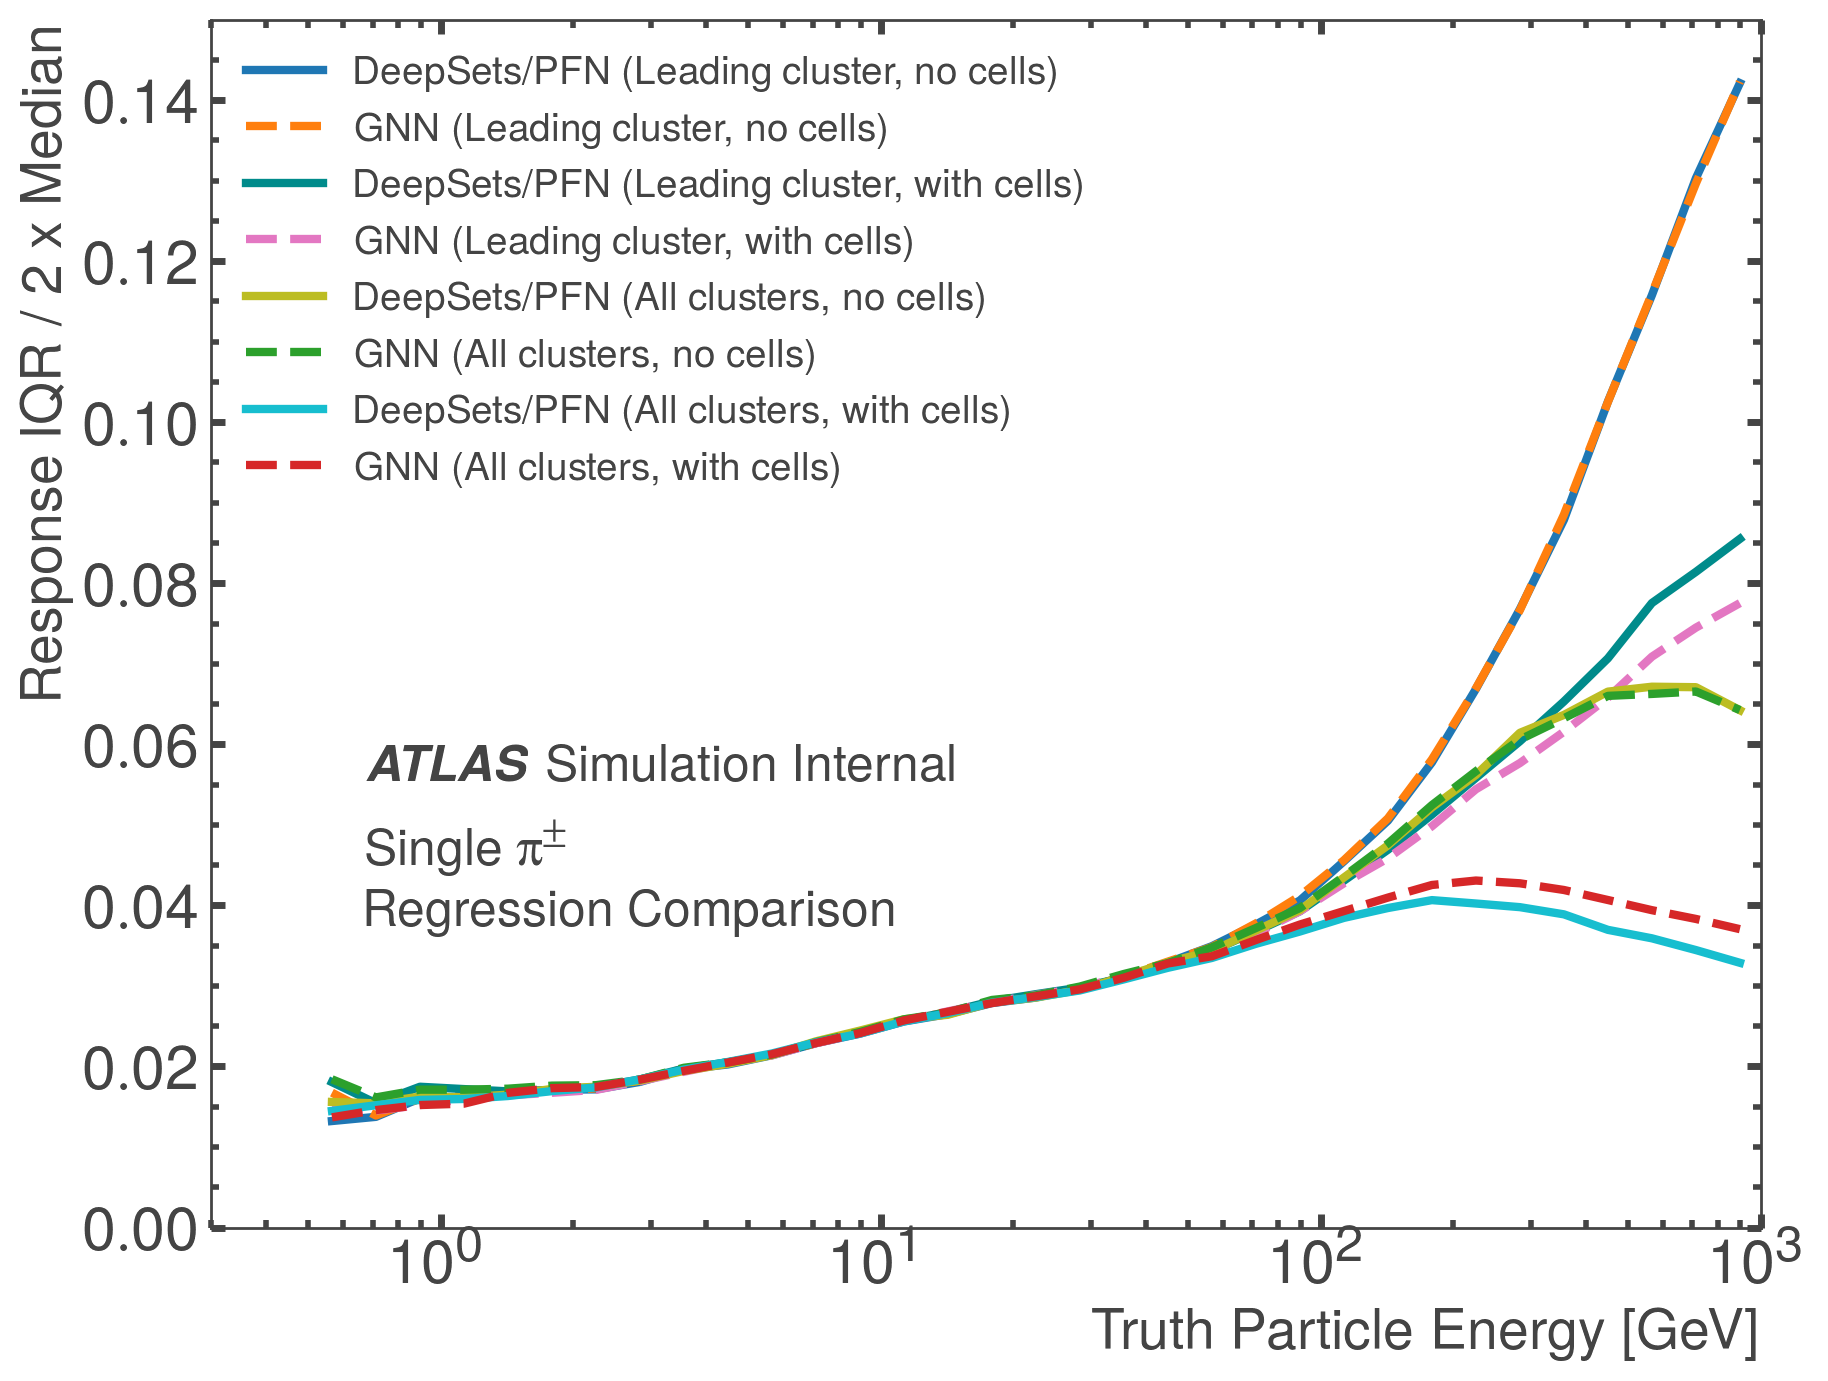

In [12]:
iqr_pfn = np.load('pub_note_results/iqr_deepsets_allclusters_cells.npz') # Piyush
iqr_pfn_nocells = np.load('pub_note_results/iqr_deepsets_allclusters_nocells.npz') # Piyush
iqr_gnn = np.load('pub_note_results/iqr_gnn_allclusters_cells.npz')
iqr_gnn_nocells = np.load('pub_note_results/iqr_gnn_allclusters_nocells.npz')

iqr_lead_pfn = np.load('pub_note_results/iqr_deepsets_leadcluster_cells.npz') # Piyush
iqr_lead_pfn_nocells = np.load('pub_note_results/iqr_deepsets_leadcluster_nocells.npz') # Piyush
iqr_lead_gnn = np.load('pub_note_results/iqr_gnn_leadcluster_cells.npz')
iqr_lead_gnn_nocells = np.load('pub_note_results/iqr_gnn_leadcluster_nocells.npz')

xcenter = iqr_gnn['xcenter']

iqrs = [
    
    iqr_lead_pfn_nocells['iqr'][0,:],
    iqr_lead_gnn_nocells['iqr'][0,:],
    iqr_lead_pfn['iqr'][0,:],
    iqr_lead_gnn['iqr'][0,:],
    
    iqr_pfn_nocells['iqr'][0,:],
    iqr_gnn_nocells['iqr'][0,:],
    iqr_pfn['iqr'][0,:],
    iqr_gnn['iqr'][0,:],
]

labels = [
    
        'DeepSets/PFN (Leading cluster, no cells)', 
        'GNN (Leading cluster, no cells)',
    
        'DeepSets/PFN (Leading cluster, with cells)', 
        'GNN (Leading cluster, with cells)', 
    
        'DeepSets/PFN (All clusters, no cells)', 
        'GNN (All clusters, no cells)',
    
        'DeepSets/PFN (All clusters, with cells)', 
        'GNN (All clusters, with cells)', 
]

colors = ['tab:blue',  'tab:orange', 'darkcyan', 'tab:pink', 
         'tab:olive', 'tab:green', 'tab:cyan', 'tab:red']

pu.lineOverlay(xcenter=xcenter, lines = iqrs, 
            labels = labels,
           colors = colors,
            xlabel = 'Truth Particle Energy [GeV]', ylabel = 'Response IQR / 2 x Median',
            y_max = 0.15,  # default = 0.5
               x_min = .3,
            linestyles = [
                'solid','dashed', 'solid','dashed',
                'solid','dashed', 'solid','dashed',
            ],  
            atlas_x = 0.1, atlas_y = 0.4, simulation = True,
            textlist = [{'x': 0.1, 'y': 0.3, 'text': 'Single $\pi^{\pm}$'},
                        {'x': 0.1, 'y': 0.25,  'text': 'Regression Comparison'}],
              figfile='pub_note_results/cells_vs_nocells_iqr.pdf'
              )